In [1]:
import numpy as np
from scipy.spatial.distance import pdist
from sklearn import datasets
from LinearDiscriminantAnalysis import LDA
from scipy.io import loadmat
import matplotlib.pyplot as plt
from util import accuracy

from KNearestNeighbors import KNearestNeighbor as KNN
# TODO separately create a spot for Datasets based on Dr. Somersalo's mat files
# TODO figure out how to import the sting library

# ECG data

In [2]:
# Training DATA

mat1 = loadmat(r'/Users/liamjeske/Downloads/ECG_train.mat',simplify_cells=True)
ECG_test_abnormal1 = mat1['X_train_abnormal']
ECG_test_normal1 = mat1['X_train_normal']

# 64 normal and 36 abnormal
ECG_trainy = np.array([0]*64 + [1]*36)
ECG_trainX = np.array( np.append(ECG_test_normal1, ECG_test_abnormal1, axis=0))
# Testing DATA
mat2 = loadmat(r'/Users/liamjeske/Downloads/ECG_test.mat', simplify_cells=True)
ECG_test_abnormal2 = mat2['X_test_abnormal']
ECG_test_normal2 = mat2['X_test_normal']

# 64 normal and 36 abnormal
ECG_testy = np.array([0]*len(ECG_test_normal2) + [1]*len(ECG_test_abnormal2))
ECG_testX = np.array( np.append(ECG_test_normal2, ECG_test_abnormal2, axis=0))

Text(0.5, 0.98, 'Histogram of LDA Projected Training Data')

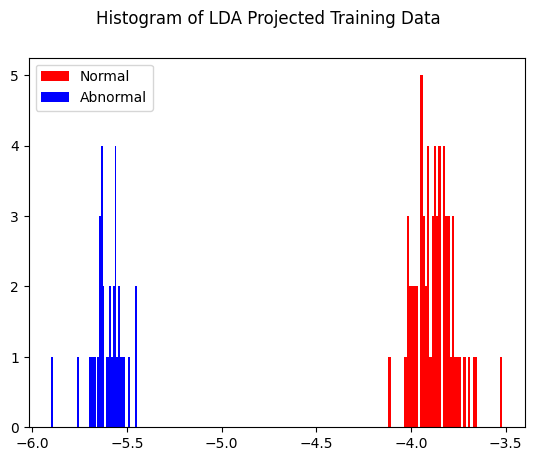

In [3]:
a = LDA(1, KNN(5))
a.fit(ECG_trainX, y=ECG_trainy)
p = a.transform(ECG_trainX.T).flatten()

plt.hist(p[:64],color='red',bins=50, label="Normal")
plt.hist(p[64:],color='blue',bins=50, label="Abnormal")
plt.legend()
plt.suptitle("Histogram of LDA Projected Training Data")

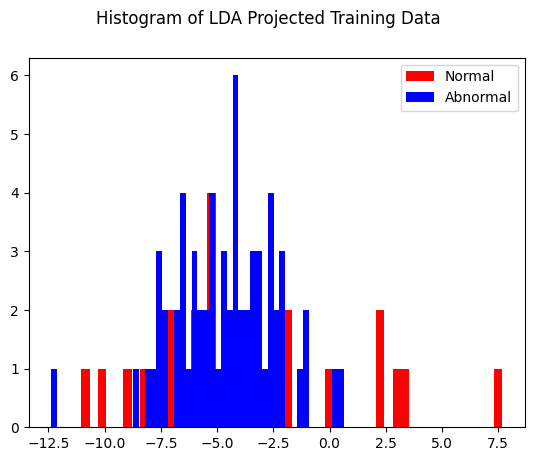

In [4]:
p2 = a.transform(ECG_testX.T).flatten()

plt.hist(p2[ECG_testy==1],color='red',bins=50, label="Normal")
plt.hist(p2[ECG_testy==0],color='blue',bins=50, label="Abnormal")
plt.legend()
plt.suptitle("Histogram of LDA Projected Training Data")
plt.show()

In [5]:
np.sum(a.predict(ECG_testX) == ECG_testy) / len(ECG_testy)

0.78

In [6]:
from DistanceClassifier import DistanceClassifier as DC
dc = DC()
dc.fit(ECG_trainX, ECG_trainy)
np.sum(dc.predict(ECG_testX) == ECG_testy) / len(ECG_testy)

0.75

In [7]:
k = KNN(5)
k.fit(ECG_trainX,ECG_trainy)
plab = k.predict(ECG_testX)
accuracy(plab,ECG_testy)

0.79

In [9]:
type(a)

LinearDiscriminantAnalysis.LDA